In [29]:
%matplotlib inline
import pylab as pb
import numpy as np
# pylab.ion()
import GPy

In [30]:
#This functions generate data corresponding to two outputs
f_output1 = lambda x: 4. * np.cos(x/5.) - .4*x - 35. + np.random.rand(x.size)[:,None] * 2.
f_output2 = lambda x: 6. * np.cos(x/5.) + .2*x + 35. + np.random.rand(x.size)[:,None] * 8.


#{X,Y} training set for each output
X1 = np.random.rand(100)[:,None]; X1=X1*75
X2 = np.random.rand(100)[:,None]; X2=X2*70 + 30
Y1 = f_output1(X1)
Y2 = f_output2(X2)
#{X,Y} test set for each output
Xt1 = np.random.rand(100)[:,None]*100
Xt2 = np.random.rand(100)[:,None]*100
Yt1 = f_output1(Xt1)
Yt2 = f_output2(Xt2)


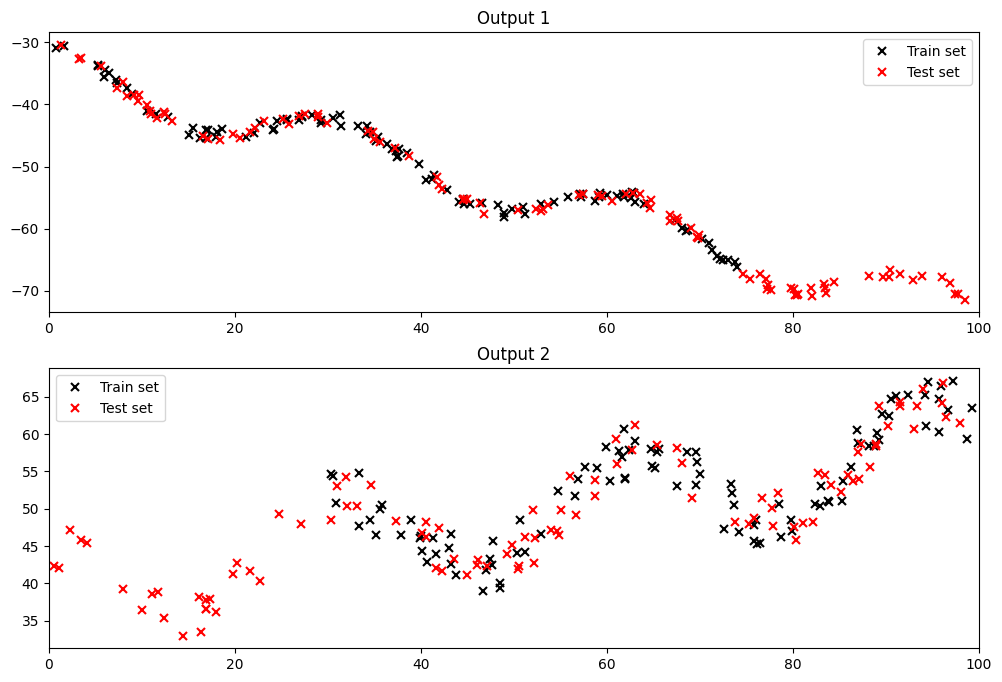

In [31]:
xlim = (0,100); ylim = (0,50)
fig = pb.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1.set_xlim(xlim)
ax1.set_title('Output 1')
ax1.plot(X1[:,:1],Y1,'kx',mew=1.5,label='Train set')
ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5,label='Test set')
ax1.legend()
ax2 = fig.add_subplot(212)
ax2.set_xlim(xlim)
ax2.set_title('Output 2')
ax2.plot(X2[:,:1],Y2,'kx',mew=1.5,label='Train set')
ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5,label='Test set')
ax2.legend()

In [32]:
def plot_2outputs(m,xlim,ylim):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,100),ax=ax1)
    ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5)
    # #Output 2
    # ax2 = fig.add_subplot(212)
    # ax2.set_xlim(xlim)
    # ax2.set_title('Output 2')
    # m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(100,200),ax=ax2)
    # ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5)


In [33]:
X1.shape

(100, 1)

In [34]:
X2.shape

(100, 1)

In [35]:
# ICM model set up
ks = GPy.kern.RBF(np.shape(X1)[1])
icm = GPy.util.multioutput.ICM(input_dim=np.shape(X1)[1],num_outputs=1,kernel=ks)

In [36]:
print(icm)
print('W matrix\n',icm.B.W)
print('\nkappa vector\n',icm.B.kappa)
print('\nB matrix\n',icm.B.B)

  ICM.             |        value  |  constraints  |  priors
  rbf.variance     |          1.0  |      +ve      |        
  rbf.lengthscale  |          1.0  |      +ve      |        
  B.W              |  [0.3048514]  |               |        
  B.kappa          |          0.5  |      +ve      |        
W matrix
   index  |    ICM.B.W  |  constraints  |  priors
  [0 0]  |  0.30485140  |               |        

kappa vector
   index  |  ICM.B.kappa  |  constraints  |  priors
  [0]    |   0.50000000  |      +ve      |        

B matrix
 [[0.59293438]]


In [37]:
m = GPy.models.GPCoregionalizedRegression([X1],[X2],kernel=icm)
m['.*rbf.var'].constrain_fixed(1.)
# constrain if converge to reasonless extrema
# m['mixed_noise.Gaussian_noise_0.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_1.variance'].constrain_bounded(0,1e-5)
# m['mixed_noise.Gaussian_noise_2.variance'].constrain_bounded(0,1e-5)
print(m)


Name : gp
Objective : 78969.39848827147
Number of Parameters : 5
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                                    |        value  |  constraints  |  priors
  ICM.rbf.variance                       |          1.0  |   +ve fixed   |        
  ICM.rbf.lengthscale                    |          1.0  |      +ve      |        
  ICM.B.W                                |  [0.3048514]  |               |        
  ICM.B.kappa                            |          0.5  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |          1.0  |      +ve      |        


In [38]:
print('W matrix\n',icm.B.W)
print('\nkappa vector\n',icm.B.kappa)

W matrix
   index  |  gp.ICM.B.W  |  constraints  |  priors
  [0 0]  |  0.30485140  |               |        

kappa vector
   index  |  gp.ICM.B.kappa  |  constraints  |  priors
  [0]    |      0.50000000  |      +ve      |        


In [39]:
m.optimize()

In [40]:
print(m)
print('W matrix\n',icm.B.W)
print('\nkappa vector\n',icm.B.kappa)
print('\nB matrix\n',icm.B.B)


Name : gp
Objective : 565.2019852028031
Number of Parameters : 5
Number of Optimization Parameters : 4
Updates : True
Parameters:
  gp.                                    |                   value  |  constraints  |  priors
  ICM.rbf.variance                       |                     1.0  |   +ve fixed   |        
  ICM.rbf.lengthscale                    |  1.2879431657214909e-05  |      +ve      |        
  ICM.B.W                                |           [68.60710423]  |               |        
  ICM.B.kappa                            |   3.624415165885804e-05  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |      44.308707474048674  |      +ve      |        
W matrix
   index  |  gp.ICM.B.W  |  constraints  |  priors
  [0 0]  |  68.60710423  |               |        

kappa vector
   index  |  gp.ICM.B.kappa  |  constraints  |  priors
  [0]    |      0.00003624  |      +ve      |        

B matrix
 [[4706.93478771]]


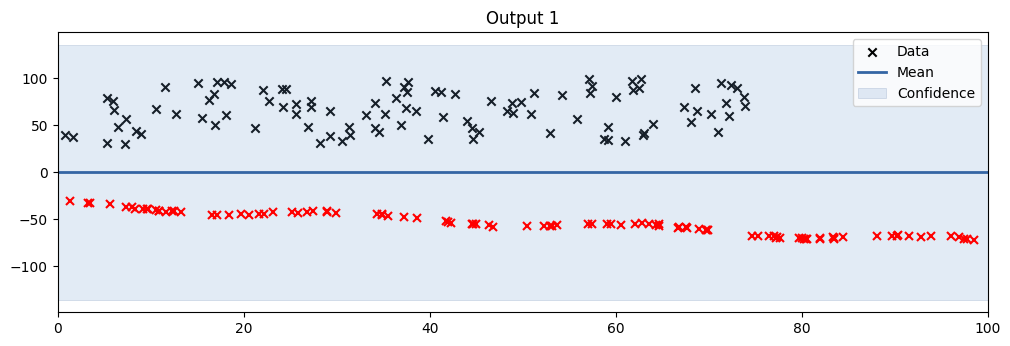

In [41]:
plot_2outputs(m,xlim=(0,100),ylim=(-20,60))

ValueError: Contour levels must be increasing

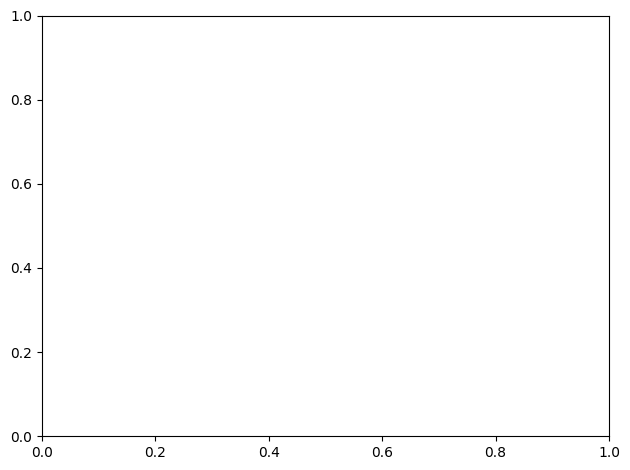

In [43]:
m.plot_mean()